# Importing Library

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import os
from scipy import stats
from pyvis.network import Network
import community as community_louvain

# Function

In [14]:
def find_top_n(centrality_dict, n=5):
    return heapq.nlargest(n, centrality_dict.items(), key=lambda x: x[1])  # Top N berdasarkan nilai centrality

def print_top_centrality(top_nodes, title):
    print(f"\n{title}:")
    for i, (node, value) in enumerate(top_nodes, start=1):
        print(f"  {i}. {node}, Centrality: {value:.4f}")

def analyze_degree_distribution(csv_path):
    """
    Comprehensive analysis of network degree distribution
    
    Parameters:
    - csv_path: Path to the CSV file containing network edges
    """
    # Load the CSV file
    df = pd.read_csv(csv_path)
    
    # Create a graph from the edge list
    G = nx.from_pandas_edgelist(df, source="hero1", target="hero2")
    
    # Calculate degrees
    degrees = [deg for _, deg in G.degree()]
    
    # Basic statistics
    average_degree = np.mean(degrees)
    median_degree = np.median(degrees)
    max_degree = max(degrees)
    min_degree = min(degrees)
    
    # Fancy print formatting
    print("\n" + "=" * 50)
    print(f"{'NETWORK DEGREE DISTRIBUTION ANALYSIS':^50}")
    print("=" * 50)
    
    # Basic network statistics
    print(f"\n{'Network Statistics':^50}")
    print("-" * 50)
    print(f"{'Total Nodes':<30} {len(G.nodes()):>18}")
    print(f"{'Average Degree':<30} {average_degree:>18.2f}")
    print(f"{'Median Degree':<30} {median_degree:>18}")
    print(f"{'Maximum Degree':<30} {max_degree:>18}")
    print(f"{'Minimum Degree':<30} {min_degree:>18}")
    
    # Detailed degree distribution
    degree_counts = {}
    for degree in degrees:
        degree_counts[degree] = degree_counts.get(degree, 0) + 1
    
    # Visualization of degree distribution
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(degrees, bins='auto', edgecolor='black')
    plt.title('Degree Distribution Histogram')
    plt.xlabel('Degree')
    plt.ylabel('Number of Nodes')
    
    # Log-log plot
    plt.subplot(1, 2, 2)
    plt.hist(degrees, bins='auto', log=True, edgecolor='black')
    plt.title('Log-Log Degree Distribution')
    plt.xlabel('Degree')
    plt.ylabel('Number of Nodes (Log Scale)')
    
    plt.tight_layout()
    plt.show()
    
    # Top 10 nodes section
    print("\n" + f"{'Top 10 Nodes by Degree':^50}")
    print("-" * 50)
    top_nodes = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:10]
    for rank, (node, degree) in enumerate(top_nodes, 1):
        print(f"{rank:<5} {node:<30} Degree: {degree:>10}")
    
    print("\n" + "=" * 50)
    
def analyze_clustering_coefficient(csv_path):
    """
    Comprehensive analysis of network clustering coefficient
    
    Parameters:
    - csv_path: Path to the CSV file containing network edges
    """
    # Load the CSV file
    df = pd.read_csv(csv_path)
    
    # Create a graph from the edge list
    G = nx.from_pandas_edgelist(df, source="hero1", target="hero2")
    
    # Calculate global clustering coefficient
    global_clustering = nx.average_clustering(G)
    
    # Calculate local clustering coefficients for each node
    local_clustering = nx.clustering(G)
    
    # Prepare clustering coefficient statistics
    clustering_coefficients = list(local_clustering.values())
    
    # Statistical analysis
    print("\n" + "=" * 50)
    print(f"{'NETWORK CLUSTERING COEFFICIENT ANALYSIS':^50}")
    print("=" * 50)
    
    # Global clustering coefficient summary
    print("\n" + f"{'Global Clustering Coefficient':^50}")
    print("-" * 50)
    print(f"{'Global Average':<30} {global_clustering:>18.4f}")
    
    # Local clustering coefficient statistics
    print("\n" + f"{'Local Clustering Coefficient Statistics':^50}")
    print("-" * 50)
    print(f"{'Mean Local Coefficient':<30} {np.mean(clustering_coefficients):>18.4f}")
    print(f"{'Median Local Coefficient':<30} {np.median(clustering_coefficients):>18.4f}")
    print(f"{'Min Local Coefficient':<30} {np.min(clustering_coefficients):>18.4f}")
    print(f"{'Max Local Coefficient':<30} {np.max(clustering_coefficients):>18.4f}")
    
    # Top 10 nodes with highest local clustering coefficients
    sorted_local_clustering = sorted(local_clustering.items(), key=lambda x: x[1], reverse=True)[:10]
    
    print("\n" + f"{'Top 10 Nodes by Local Clustering Coefficient':^50}")
    print("-" * 50)
    for rank, (node, coefficient) in enumerate(sorted_local_clustering, 1):
        print(f"{rank:<5} {node:<30} Coefficient: {coefficient:>10.4f}")
    
    # Visualization
    plt.figure(figsize=(12, 5))
    
    # Histogram of local clustering coefficients
    plt.subplot(1, 2, 1)
    plt.hist(clustering_coefficients, bins='auto', edgecolor='black')
    plt.title('Local Clustering Coefficient Distribution')
    plt.xlabel('Clustering Coefficient')
    plt.ylabel('Number of Nodes')
    
    # Log-scale histogram
    plt.subplot(1, 2, 2)
    plt.hist(clustering_coefficients, bins='auto', log=True, edgecolor='black')
    plt.title('Log-Scale Clustering Coefficient')
    plt.xlabel('Clustering Coefficient')
    plt.ylabel('Number of Nodes (Log Scale)')
    
    plt.tight_layout()
    plt.show()
    
    # Additional insights
    print("\n" + f"{'Clustering Coefficient Insights':^50}")
    print("-" * 50)
    
    # Classify nodes based on clustering
    high_clustering = sum(1 for coeff in clustering_coefficients if coeff > global_clustering)
    percentage_high_clustering = (high_clustering / len(clustering_coefficients)) * 100
    
    print(f"{'Nodes with Above-Average Clustering':<40} {high_clustering:>10} ({percentage_high_clustering:.2f}%)")
    
    print("\n" + "=" * 50)

def analyze_network_components(csv_path):
    """
    Comprehensive analysis of network components, diameters, and path lengths
    
    Parameters:
    - csv_path: Path to the CSV file containing network edges
    """
    # Load the CSV file
    df = pd.read_csv(csv_path)
    
    # Create a graph from the edge list
    G = nx.from_pandas_edgelist(df, source="hero1", target="hero2")
    
    # Check connectivity
    print("\n" + "=" * 50)
    print(f"{'NETWORK COMPONENTS ANALYSIS':^50}")
    print("=" * 50)
    
    # Check if the graph is connected
    if nx.is_connected(G):
        print("\n" + f"{'Network Connectivity':^50}")
        print("-" * 50)
        print(f"{'Network Status':<30} {'Fully Connected':>20}")
        
        # Calculate overall network diameter and average path length
        diameter = nx.diameter(G)
        avg_path_length = nx.average_shortest_path_length(G)
        
        print(f"{'Network Diameter':<30} {diameter:>20}")
        print(f"{'Average Path Length':<30} {avg_path_length:>20.4f}")
    
    else:
        # Separate connected components
        components = list(nx.connected_components(G))
        
        # Detailed component analysis
        print("\n" + f"{'Network Components Details':^50}")
        print("-" * 50)
        print(f"{'Total Number of Components':<30} {len(components):>20}")
        
        # Prepare lists for visualization and summary
        component_sizes = [len(component) for component in components]
        diameters = []
        avg_path_lengths = []
        
        # Analyze each component
        print("\n" + f"{'Component-wise Analysis':^50}")
        print("-" * 50)
        print(f"{'Rank':<5} {'Size':<15} {'Diameter':<15} {'Avg Path Length':<20}")
        print("-" * 50)
        
        for i, component in enumerate(sorted(components, key=len, reverse=True), 1):
            subgraph = G.subgraph(component)
            
            # Calculate diameter and average path length
            try:
                diameter = nx.diameter(subgraph)
                avg_path_length = nx.average_shortest_path_length(subgraph)
            except nx.NetworkXError:
                # Handle cases with very small components
                diameter = 0
                avg_path_length = 0
            
            diameters.append(diameter)
            avg_path_lengths.append(avg_path_length)
            
            print(f"{i:<5} {len(component):<15} {diameter:<15} {avg_path_length:<20.4f}")
        
        # Visualization
        plt.figure(figsize=(12, 5))
        
        # Component sizes
        plt.subplot(1, 2, 1)
        plt.bar(range(1, len(component_sizes) + 1), sorted(component_sizes, reverse=True))
        plt.title('Connected Component Sizes')
        plt.xlabel('Component Rank')
        plt.ylabel('Number of Nodes')
        
        # Diameters
        plt.subplot(1, 2, 2)
        plt.bar(range(1, len(diameters) + 1), sorted(diameters, reverse=True))
        plt.title('Component Diameters')
        plt.xlabel('Component Rank')
        plt.ylabel('Diameter')
        
        plt.tight_layout()
        plt.show()
        
        # Summary statistics
        print("\n" + f"{'Summary Statistics':^50}")
        print("-" * 50)
        print(f"{'Largest Component Size':<30} {max(component_sizes):>20}")
        print(f"{'Largest Component Diameter':<30} {max(diameters):>20}")
        print(f"{'Average Component Diameter':<30} {np.mean(diameters):>20.4f}")
        print(f"{'Average Component Path Length':<30} {np.mean(avg_path_lengths):>20.4f}")



def analyze_scaling_exponent(csv_path):
    """
    Analyze the scaling exponent of the network's degree distribution
    
    Parameters:
    - csv_path: Path to the CSV file containing network edges
    """
    # Load the CSV file
    df = pd.read_csv(csv_path)
    
    # Create a graph from the edge list
    G = nx.from_pandas_edgelist(df, source="hero1", target="hero2")
    
    # Calculate degrees
    degrees = [deg for _, deg in G.degree()]
    
    # Sort degrees in descending order
    sorted_degrees = sorted(degrees, reverse=True)
    
    # Prepare data for log-log plot
    degree_counts = {}
    for degree in sorted_degrees:
        degree_counts[degree] = degree_counts.get(degree, 0) + 1
    
    # Aggregate data for scaling analysis
    unique_degrees = sorted(set(sorted_degrees), reverse=True)
    degree_freqs = [sum(1 for d in sorted_degrees if d >= deg) for deg in unique_degrees]
    
    # Print formatting
    print("\n" + "=" * 50)
    print(f"{'NETWORK SCALING EXPONENT ANALYSIS':^50}")
    print("=" * 50)
    
    # Log-log linear regression to estimate scaling exponent
    try:
        # Take log of degrees and frequencies
        log_degrees = np.log(unique_degrees)
        log_freqs = np.log(degree_freqs)
        
        # Linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(log_degrees, log_freqs)
        
        print("\n" + f"{'Scaling Exponent Estimation':^50}")
        print("-" * 50)
        print(f"{'Scaling Exponent (Power Law Exponent)':<35} {-slope:>15.4f}")
        print(f"{'R-squared':<35} {r_value**2:>15.4f}")
        print(f"{'P-value':<35} {p_value:>15.4f}")
        print(f"{'Standard Error':<35} {std_err:>15.4f}")
        
        # Interpretation of scaling exponent
        print("\n" + f"{'Scaling Exponent Interpretation':^50}")
        print("-" * 50)
        if 2 <= -slope <= 3:
            network_type = "Typical Scale-Free Network"
        elif -slope < 2:
            network_type = "Highly Connected Network"
        else:
            network_type = "Sparse Network"
        
        print(f"{'Network Type':<35} {network_type:>15}")
    except Exception as e:
        print(f"Error calculating scaling exponent: {e}")
    
    # Visualization
    plt.figure(figsize=(12, 5))
    
    # Log-log degree distribution
    plt.subplot(1, 2, 1)
    plt.loglog(unique_degrees, degree_freqs, 'bo-', markersize=3)
    plt.title('Log-Log Degree Distribution')
    plt.xlabel('Degree (log scale)')
    plt.ylabel('Frequency (log scale)')
    
    # Linear fit on log-log plot
    plt.subplot(1, 2, 2)
    plt.scatter(log_degrees, log_freqs, alpha=0.7)
    plt.plot(log_degrees, slope * log_degrees + intercept, 'r-', label='Linear Fit')
    plt.title('Linear Regression of Log-Log Plot')
    plt.xlabel('Log(Degree)')
    plt.ylabel('Log(Frequency)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    print("\n" + "=" * 50)

def analyze_network_assortativity(csv_path):
    """
    Analyze the assortativity of the network's degree distribution
    
    Parameters:
    - csv_path: Path to the CSV file containing network edges
    """
    # Load the CSV file
    df = pd.read_csv(csv_path)
    
    # Create a graph from the edge list
    # Modify the column names as needed to match your CSV structure
    G = nx.from_pandas_edgelist(df, source="hero1", target="hero2")
    
    # Calculate degrees
    degrees = [deg for _, deg in G.degree()]
    
    # Print formatting
    print("\n" + "=" * 50)
    print(f"{'NETWORK ASSORTATIVITY ANALYSIS':^50}")
    print("=" * 50)
    
    # Assortativity calculation
    try:
        # Calculate degree assortativity coefficient
        assortativity = nx.degree_assortativity_coefficient(G)
        
        # Compute neighbor degree correlation
        neighbor_degrees = [np.mean([G.degree(nbr) for nbr in G.neighbors(n)]) for n in G.nodes()]
        
        # Correlation between node degrees and neighbor degrees
        correlation, p_value = stats.pearsonr(degrees, neighbor_degrees)
        
        # Assortativity details
        print("\n" + f"{'Assortativity Analysis':^50}")
        print("-" * 50)
        print(f"{'Assortativity Coefficient':<35} {assortativity:>15.4f}")
        print(f"{'Neighbor Degree Correlation':<35} {correlation:>15.4f}")
        print(f"{'P-value':<35} {p_value:>15.4f}")
        
        # Interpretation of assortativity
        print("\n" + f"{'Assortativity Interpretation':^50}")
        print("-" * 50)
        if assortativity > 0.3:
            mixing_type = "Strong Assortative Mixing"
            description = "Nodes tend to connect with similar-degree nodes"
        elif assortativity > 0:
            mixing_type = "Weak Assortative Mixing"
            description = "Slight tendency for nodes to connect with similar-degree nodes"
        elif assortativity == 0:
            mixing_type = "Neutral Mixing"
            description = "No significant degree-based preference in connections"
        elif assortativity > -0.3:
            mixing_type = "Weak Disassortative Mixing"
            description = "Slight tendency for nodes to connect across different degrees"
        else:
            mixing_type = "Strong Disassortative Mixing"
            description = "Nodes tend to connect across different degrees"
        
        print(f"{'Mixing Type':<35} {mixing_type:>15}")
        print(f"{'Description':<35} {description:>15}")
    
    except Exception as e:
        print(f"Error calculating assortativity: {e}")
    
    print("\n" + "=" * 50)

def analyze_network_modularity(csv_path):
    """
    Analyze the modularity of the network
    
    Parameters:
    - csv_path: Path to the CSV file containing network edges
    """
    # Load the CSV file
    df = pd.read_csv(csv_path)
    
    # Create a graph from the edge list
    # Modify the column names as needed to match your CSV structure
    G = nx.from_pandas_edgelist(df, source="hero1", target="hero2")
    
    # Print formatting
    print("\n" + "=" * 50)
    print(f"{'NETWORK MODULARITY ANALYSIS':^50}")
    print("=" * 50)
    
    try:
        # Community detection using Louvain method
        partition = community_louvain.best_partition(G)
        
        # Calculate modularity
        modularity = community_louvain.modularity(partition, G)
        
        # Count communities
        communities = {}
        for com in set(partition.values()):
            communities[com] = list(nodes for nodes in partition.keys() 
                                    if partition[nodes] == com)
        
        # Modularity analysis
        print("\n" + f"{'Modularity Analysis':^50}")
        print("-" * 50)
        print(f"{'Modularity Coefficient':<35} {modularity:>15.4f}")
        print(f"{'Number of Communities':<35} {len(communities):>15}")
        
        # Community size distribution
        community_sizes = [len(comm) for comm in communities.values()]
        print(f"{'Smallest Community Size':<35} {min(community_sizes):>15}")
        print(f"{'Largest Community Size':<35} {max(community_sizes):>15}")
        print(f"{'Average Community Size':<35} {np.mean(community_sizes):>15.2f}")
        
        # Interpretation of modularity
        print("\n" + f"{'Modularity Interpretation':^50}")
        print("-" * 50)
        if modularity > 0.7:
            quality = "High Modularity"
            description = "Strong community structure"
        elif modularity > 0.3:
            quality = "Moderate Modularity"
            description = "Noticeable community structure"
        else:
            quality = "Low Modularity"
            description = "Weak or no clear community structure"
        
        print(f"{'Modularity Quality':<35} {quality:>15}")
        print(f"{'Description':<35} {description:>15}")
        
        # Visualization
        plt.figure(figsize=(15, 5))
        
        # Community Size Distribution
        plt.subplot(1, 3, 1)
        plt.hist(community_sizes, bins=min(20, len(communities)), edgecolor='black')
        plt.title('Community Size Distribution')
        plt.xlabel('Community Size')
        plt.ylabel('Frequency')
        
        # Network Visualization with Communities
        plt.subplot(1, 3, 2)
        pos = nx.spring_layout(G, seed=42)
        colors = [partition[node] for node in G.nodes()]
        nx.draw(G, pos, node_color=colors, cmap=plt.cm.rainbow, 
                with_labels=False, node_size=30, alpha=0.8)
        plt.title('Network Communities')
        
        # Community Size Boxplot
        plt.subplot(1, 3, 3)
        plt.boxplot(community_sizes)
        plt.title('Community Size Distribution')
        plt.ylabel('Number of Nodes')
        
        plt.tight_layout()
        plt.show()
    
    except Exception as e:
        print(f"Error analyzing modularity: {e}")
    
    print("\n" + "=" * 50)

# Visualization

In [3]:
def visualize_large_network(csv_files, output_path='network_visualization.html', 
                             community_detection=True):
    """
    Visualize the entire network with interactive features
    
    Parameters:
    - csv_files: Path to the CSV file containing network edges
    - output_path: Path to save the HTML visualization
    - community_detection: Whether to use community detection for coloring
    """

    # Load the CSV file
    import os
    import pandas as pd
    import networkx as nx
    from pyvis.network import Network
    try:
        from community import community_louvain
    except ImportError:
        print("community-louvain package not installed.")
        community_louvain = None

    df = pd.read_csv(csv_files)

    # Create a graph from the edge list
    G = nx.from_pandas_edgelist(df, source="hero1", target="hero2")
    
    # Ensure output directory exists
    os.makedirs(os.path.dirname(output_path) or '.', exist_ok=True)
    
    # Community detection for node coloring
    if community_detection and community_louvain:
        try:
            partition = community_louvain.best_partition(G)
            # Count communities
            communities = {}
            for com in set(partition.values()):
                communities[com] = list(nodes for nodes in partition.keys() 
                                        if partition[nodes] == com)
            num_communities = len(communities)
        except Exception as e:
            print(f"Error in community detection: {e}")
            partition = {node: 0 for node in G.nodes()}
            num_communities = 1
    else:
        partition = {node: 0 for node in G.nodes()}
        num_communities = 1
    
    # Create Pyvis network with increased size and memory
    net = Network(
        height="1200px", 
        width="100%", 
        bgcolor="#222222", 
        font_color="white",
        notebook=True,  # Helps with larger networks
        cdn_resources='remote'  # Use remote resources to handle large networks
    )
    
    # Disable physics
    net.toggle_physics(False)  
    
    # Color palette
    color_palette = [
        '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
        '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
    ]
    
    # Add nodes with community-based coloring
    for node in G.nodes():
        community = partition[node]
        color = color_palette[community % len(color_palette)]
        
        # Size nodes based on degree
        node_size = max(10, min(50, G.degree(node)))
        
        net.add_node(
            node, 
            label=str(node), 
            title=f"Node: {node}\nDegree: {G.degree(node)}", 
            color=color, 
            size=node_size
        )
    
    # Add edges
    for edge in G.edges():
        net.add_edge(edge[0], edge[1])
    
    # Customize interaction options without physics
    net.set_options('''
    var options = {
        "nodes": {
            "font": {
                "size": 10
            }
        },
        "edges": {
            "color": {
                "inherit": true
            },
            "smooth": false
        }
    }
    ''')
    
    # Save the network visualization
    try:
        net.save_graph(output_path)
        print(f"Network visualization saved to {output_path}")
    except Exception as e:
        print(f"Error saving network visualization: {e}")
    
    # Print network statistics
    print(f"Network Statistics:")
    print(f"Total Nodes: {G.number_of_nodes()}")
    print(f"Total Edges: {G.number_of_edges()}")
    print(f"Number of Communities: {num_communities}")
    
    return net

# Example usage
try:
    network = visualize_large_network(
        'hero-network.csv', 
        output_path="hero_network_visualization_full.html",
        community_detection=True
    )
except Exception as e:
    print(f"An error occurred: {e}")


Network visualization saved to hero_network_visualization_full.html
Network Statistics:
Total Nodes: 6426
Total Edges: 167219
Number of Communities: 24


# Network Metrics

### Centrality Measures

In [4]:
df = pd.read_csv('hero-network.csv')

G = nx.from_pandas_edgelist(df, source="hero1", target="hero2")

In [5]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
pagerank = nx.pagerank(G)

# Temukan top 10 node untuk setiap centrality
top_10_degree = find_top_n(degree_centrality, n=10)
top_10_betweenness = find_top_n(betweenness_centrality, n=10)
top_10_closeness = find_top_n(closeness_centrality, n=10)
top_10_eigenvector = find_top_n(eigenvector_centrality, n=10)
top_10_pagerank = find_top_n(pagerank, n=10)

# Cetak Top 5 node untuk setiap centrality
print("=" * 40)
print("Top 10 Node dengan Centrality Tertinggi")
print("=" * 40)

print_top_centrality(top_10_degree, "Degree Centrality")
print_top_centrality(top_10_betweenness, "Betweenness Centrality")
print_top_centrality(top_10_closeness, "Closeness Centrality")
print_top_centrality(top_10_eigenvector, "Eigenvector Centrality")
print_top_centrality(top_10_pagerank, "PageRank")
print("=" * 40)



Top 10 Node dengan Centrality Tertinggi

Degree Centrality:
  1. CAPTAIN AMERICA, Centrality: 0.2970
  2. SPIDER-MAN/PETER PAR, Centrality: 0.2704
  3. IRON MAN/TONY STARK , Centrality: 0.2369
  4. THING/BENJAMIN J. GR, Centrality: 0.2204
  5. MR. FANTASTIC/REED R, Centrality: 0.2146
  6. WOLVERINE/LOGAN , Centrality: 0.2134
  7. HUMAN TORCH/JOHNNY S, Centrality: 0.2118
  8. SCARLET WITCH/WANDA , Centrality: 0.2062
  9. THOR/DR. DONALD BLAK, Centrality: 0.2006
  10. BEAST/HENRY &HANK& P, Centrality: 0.1972

Betweenness Centrality:
  1. SPIDER-MAN/PETER PAR, Centrality: 0.0735
  2. CAPTAIN AMERICA, Centrality: 0.0570
  3. IRON MAN/TONY STARK , Centrality: 0.0372
  4. WOLVERINE/LOGAN , Centrality: 0.0357
  5. HAVOK/ALEX SUMMERS , Centrality: 0.0357
  6. DR. STRANGE/STEPHEN , Centrality: 0.0292
  7. THING/BENJAMIN J. GR, Centrality: 0.0254
  8. HAWK, Centrality: 0.0248
  9. HULK/DR. ROBERT BRUC, Centrality: 0.0239
  10. MR. FANTASTIC/REED R, Centrality: 0.0238

Closeness Centrality:
  1. 

Degree Centrality: Captain America dan Spider Man merupakan karakter yang paling populer dan memiliki frekuensi interaksi yang paling banyak dengan karakter lain <br>
Betweeness Centrality: Spider Man memegang peranan penting dalam penghubung antara grup karakter<br>
Closeness Centrality: Captain America memiliki aksesibilitas yang baik ke seluruh jaringan<br>
Eigenvector Centrality: Captain America memiliki koneksi dengan node-node penting lainnya<br>
PageRank Centrality: Spiderman merupakan karakter yang memiliki pengaruh paling besar di jaringan<br>

### Average Degree and Degree Distribution


       NETWORK DEGREE DISTRIBUTION ANALYSIS       

                Network Statistics                
--------------------------------------------------
Total Nodes                                  6426
Average Degree                              52.04
Median Degree                                20.0
Maximum Degree                               1908
Minimum Degree                                  1


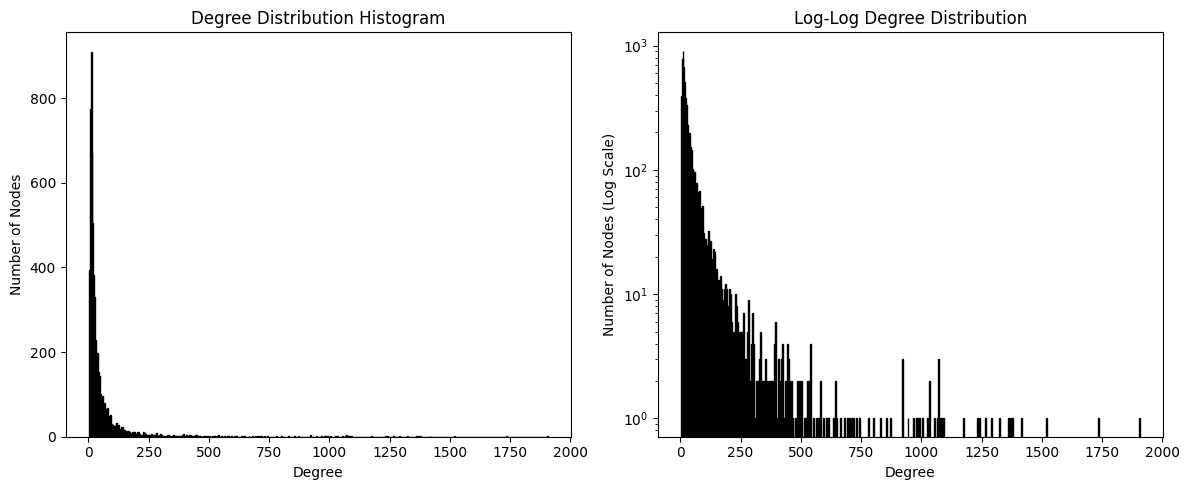


              Top 10 Nodes by Degree              
--------------------------------------------------
1     CAPTAIN AMERICA                Degree:       1908
2     SPIDER-MAN/PETER PAR           Degree:       1737
3     IRON MAN/TONY STARK            Degree:       1522
4     THING/BENJAMIN J. GR           Degree:       1416
5     MR. FANTASTIC/REED R           Degree:       1379
6     WOLVERINE/LOGAN                Degree:       1371
7     HUMAN TORCH/JOHNNY S           Degree:       1361
8     SCARLET WITCH/WANDA            Degree:       1325
9     THOR/DR. DONALD BLAK           Degree:       1289
10    BEAST/HENRY &HANK& P           Degree:       1267



In [6]:
try:
    analyze_degree_distribution("hero-network.csv")
except Exception as e:
    print(f"An error occurred: {e}")

Captain America dan Spider Man dengan degree paling banyak menunjukan bahwa mereka berdua adalah hub utama dalam jaringan ini. <br>
Degree Distribution Histogram juga menunjukan bahwa jaringan ini adalah Scale-Free Network, dimana ada sedikit karakter yang sangat terhubung sedangakan sebagian besar karakter memiliki koneksi yang sedikit

### Clustering Coefficient


     NETWORK CLUSTERING COEFFICIENT ANALYSIS      

          Global Clustering Coefficient           
--------------------------------------------------
Global Average                             0.7747

     Local Clustering Coefficient Statistics      
--------------------------------------------------
Mean Local Coefficient                     0.7747
Median Local Coefficient                   0.8611
Min Local Coefficient                      0.0000
Max Local Coefficient                      1.0000

   Top 10 Nodes by Local Clustering Coefficient   
--------------------------------------------------
1     ZANIAC/BRAD WOLFE              Coefficient:     1.0000
2     LUMLEY, JUDY                   Coefficient:     1.0000
3     MCCORMICK, BARRY               Coefficient:     1.0000
4     STAR THIEF II                  Coefficient:     1.0000
5     CONOVER, REV. WILLIA           Coefficient:     1.0000
6     CONOVER, HANNAH                Coefficient:     1.0000
7     GUARDIAN IV      

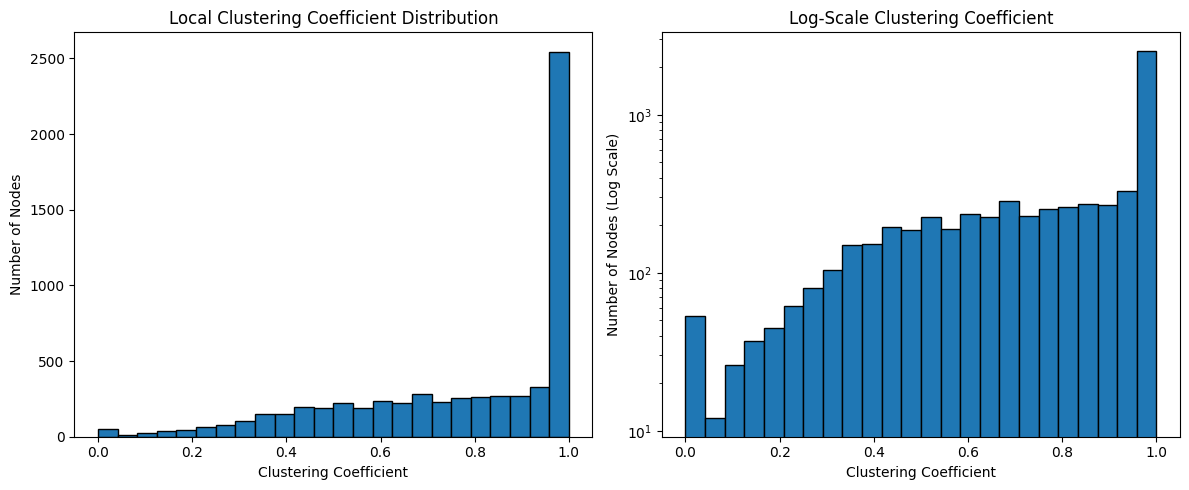


         Clustering Coefficient Insights          
--------------------------------------------------
Nodes with Above-Average Clustering            3767 (58.62%)



In [7]:
try:
    analyze_clustering_coefficient("hero-network.csv")
except Exception as e:
    print(f"An error occurred: {e}")

Clustering di dalam jaringan ini sangat tinggi yaitu 0.7747 menandakan bahwa jaringan ini memiliki struktur yang sangat terorganisasi, dan sebagian besar karakter berada dalam komunitas yang erat. <br>
Median yang lebih tinggi dari rata-rata menunjukan bahwa sebagian besar karakter memiliki komunitas yang sangat erat dengan sedikit karakter (outlier) yang memiliki clustering rendah atau 0

### Diameter and Average Path Length


           NETWORK COMPONENTS ANALYSIS            

            Network Components Details            
--------------------------------------------------
Total Number of Components                        4

             Component-wise Analysis              
--------------------------------------------------
Rank  Size            Diameter        Avg Path Length     
--------------------------------------------------
1     6408            5               2.6384              
2     9               2               1.0556              
3     7               1               1.0000              
4     2               1               1.0000              


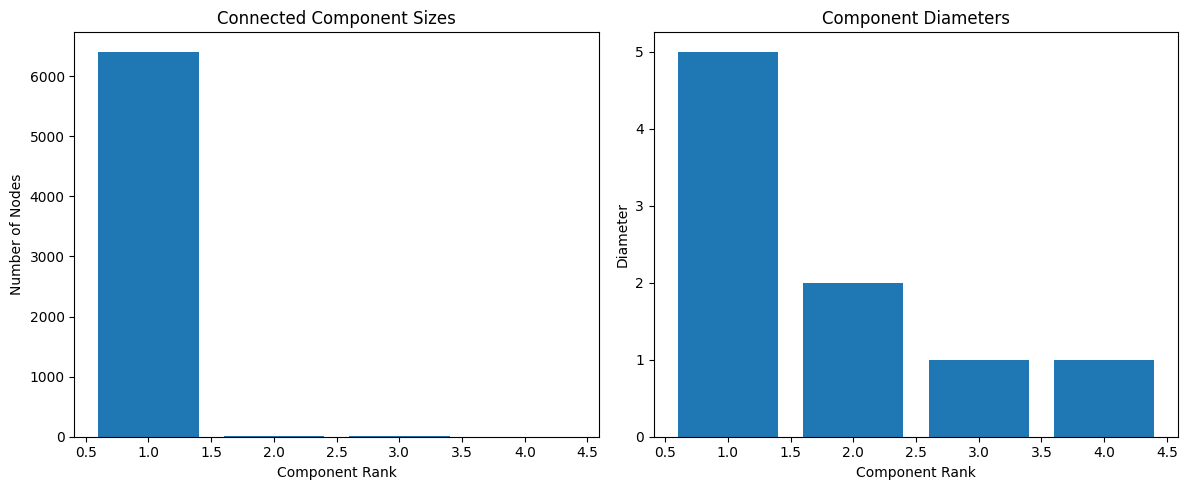


                Summary Statistics                
--------------------------------------------------
Largest Component Size                         6408
Largest Component Diameter                        5
Average Component Diameter                   2.2500
Average Component Path Length                1.4235


In [8]:
try:
    analyze_network_components("hero-network.csv")
except Exception as e:
    print(f"An error occurred: {e}")

Diameter yang cukup kecil dan average path length yang rendah menunjukan bahwa struktur jaringan ini memiliki efisiensi yang tinggi dalam konektivitas.<br> 
Nilai yang rendah ini juga menunjukan keberadaan hub besar seperti Captain America dan Spider Man memperpendek jarak dengan karakter lainnya, dengan cara menjadi pusat dalam jaringan. <br>
Diameter yang kecil dan clustering coefficient yang tinggi menunjukan bahwa jarigan ini adalah small world network. <br>


### Scaling Exponent


        NETWORK SCALING EXPONENT ANALYSIS         

           Scaling Exponent Estimation            
--------------------------------------------------
Scaling Exponent (Power Law Exponent)          1.2163
R-squared                                    0.9175
P-value                                      0.0000
Standard Error                               0.0180

         Scaling Exponent Interpretation          
--------------------------------------------------
Network Type                        Highly Connected Network


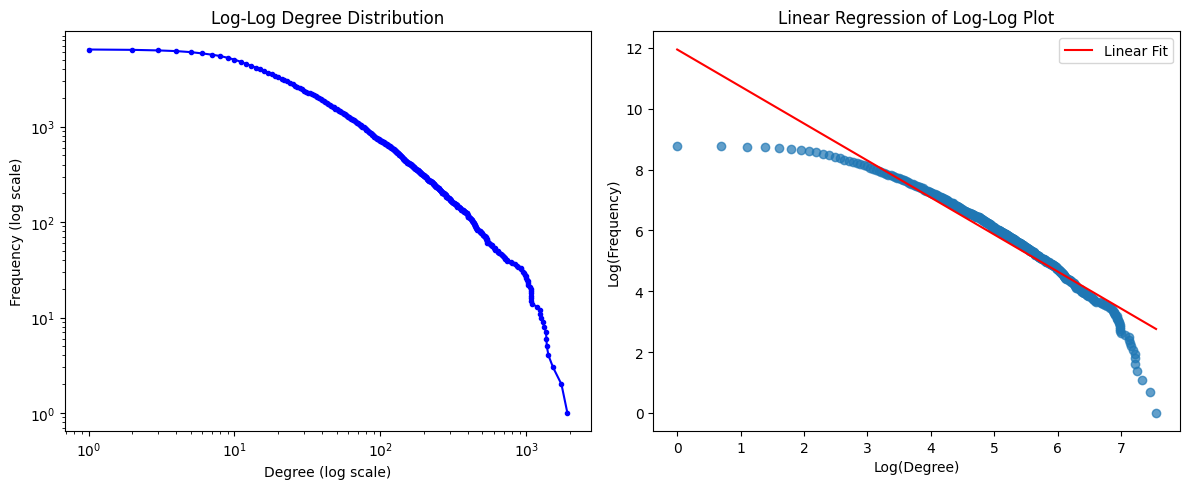

In [9]:
try:
    analyze_scaling_exponent("hero-network.csv")
except Exception as e:
    print(f"An error occurred: {e}")

Nilai Scalling Exponent yang berada diatara 1 dan 2 menunjukan bahwa sebagian besar karakter memiliki sedikit koneksi sedangkan hub memiliki hub yang sangat banyak sehingga hub utama seperti Captain America dan Spider Man sangat mendominasi jaringan ini. <br>
Nilai R squared yang tinggi juga menunjukan bahwa model power law sangat cocok dengan jaringan ini. <br>
Nilai P value 0 menunjukan bahwa distribusi power law ini tidak muncul secara kebetulan, melainkan menunjukan struktur yang terorganisir dalam Marvel Universe. <br>
Nilai Standard error yang rendah menunjukan bahwa estimasi eksponen sangat akurat. <br>
Dari hal-hal diatas dapat diketahui bahwa jaringan ini cukup robust terhadap serangan acak, tetapi cukup fragile dengan serangan yang ditargetkan.

### Assortativity

In [13]:
try:
    analyze_network_assortativity("hero-network.csv")
except Exception as e:
    print(f"An error occurred: {e}")


          NETWORK ASSORTATIVITY ANALYSIS          

              Assortativity Analysis              
--------------------------------------------------
Assortativity Coefficient                   -0.1619
Neighbor Degree Correlation                 -0.0801
P-value                                      0.0000

           Assortativity Interpretation           
--------------------------------------------------
Mixing Type                         Weak Disassortative Mixing
Description                         Slight tendency for nodes to connect across different degrees



Nilai Assortativity Coefficient -0.1619 menunjukan bahwa jaringan ini bersifat disasortatif, hal ini menunjukan bahwa hub cenderung terhubung dengan node dengan degree yang lebih rendah. <br>
Nilai Neighbor degree correlation menunjukan bahwa hub cenderung memiliki tetangga dengan degree rendah.

### Modularity


           NETWORK MODULARITY ANALYSIS            

               Modularity Analysis                
--------------------------------------------------
Modularity Coefficient                       0.4232
Number of Communities                            23
Smallest Community Size                           2
Largest Community Size                         1315
Average Community Size                       279.39

            Modularity Interpretation             
--------------------------------------------------
Modularity Quality                  Moderate Modularity
Description                         Noticeable community structure


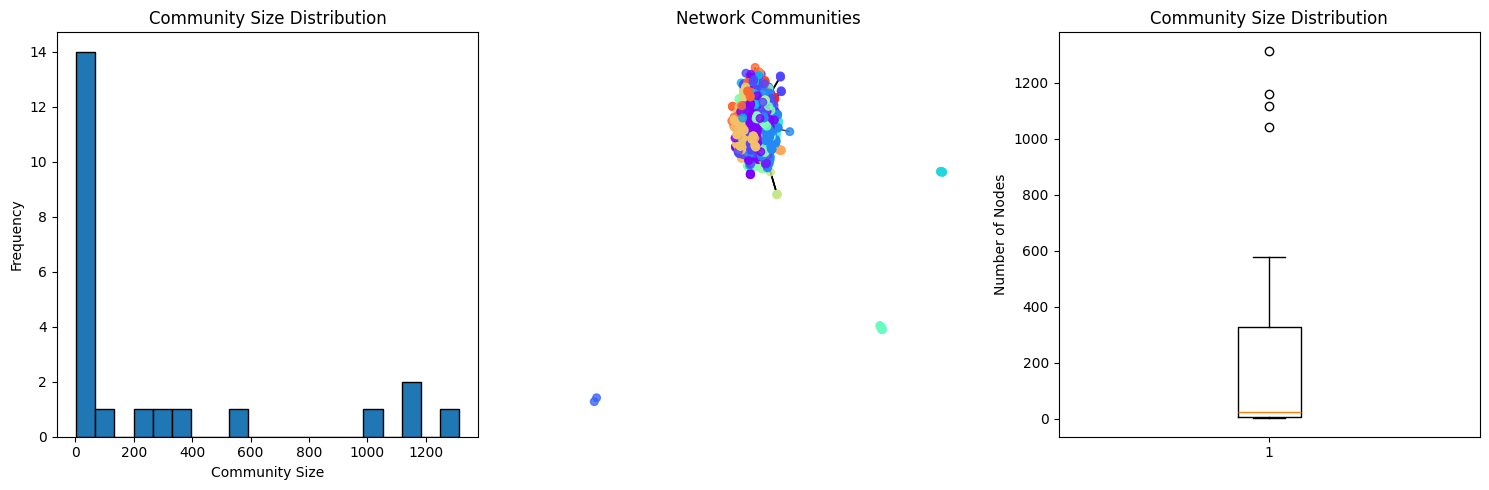

In [15]:
try:
    analyze_network_modularity("hero-network.csv")
except Exception as e:
    print(f"An error occurred: {e}")

Nilai Modularity coefficient dari jaringan ini menunjukan bahwa jaringan ini memiliki komunitas yang cukup terstruktur, nilai modularitas yang tidak terlalu tinggi juga menunjukan adanya hub besar yang menghubungkan berbagai komunitas. <br>
Terjadinya Dominasi Komunitas besar, Komunitas terbesar (1349 node) kemungkinan besar mencakup karakter inti yang sering muncul bersama dalam banyak cerita, komunitas ini juga kemungkinan besar bertindak sebagai pusat keterhubungan jaringan.

# Summary

Jaringan ini memiliki sifat:

- **Small-world**:
  - Klusterisasi tinggi.
  - Jarak pendek antar-node.

- **Scale-free**:
  - Beberapa hub utama yang mendominasi konektivitas.

- **Terstruktur komunitas**:
  - Kelompok-kelompok besar.
  - Beberapa komunitas kecil.

Selain itu, jaringan ini menunjukkan bahwa karakter (node) seperti CAPTAIN AMERICA dan SPIDER-MAN memainkan peran vital dalam menjaga integrasi jaringan.


# Komitmen Integritas

“Di hadapan TUHAN yang hidup, saya menegaskan bahwa saya tidak memberikan maupun menerima bantuan apa pun—baik lisan, tulisan, maupun elektronik—di dalam ujian ini selain daripada apa yang telah diizinkan oleh pengajar, dan tidak akan menyebarkan baik soal maupun jawaban ujian kepada pihak lain.”